# TASK 1: UNDERSTAND THE PROBLEM STATEMENT

COVID-19 is a global crisis impacting millions of people world-wide.  Specifically in the US, the disparities between the size of the black population and the percentage of black people infected with, hospitalized with, or dead from COVID-19 appear to be the most severe.

To battle this inequality our team has chosen to build an unsupervised machine learning model using __K-means clustering__ to perform population segmentation and use dimensionality reduction techniques like __PCA__ to evaluate a large number of features.  These features, include US Census Data; US COVID-19 cases, deaths and policies to help us discover new trends and patterns in solving this crisis impacting the black communities in the US.

__Goal:__

- To cluster Covid-19 and Census Data by State to gain insights into how pandemic is impacting the black population.

__Task to Perform:__
- TASK 1: UNDERSTAND THE PROBLEM STATEMENT
- TASK 2: IMPORT LIBRARIES AND DATASETS
- TASK 3: PERFORM EDA
- TASK 4: USING SKLEARN | TRAIN PCA AND K-MEANS CLUSTERING MODELS
- TASK 5: USING AWS SAGEMAKER | TRAIN AND DEPLOY PCA MODEL
- TASK 6: USING AWS SAGEMAKER | TRAIN AND DEPLOY K-MEANS MODEL
- TASK 7: PERFORM CLUSER ANALYSIS
- TASK 8: PERFORM CLUSER VISUALIZATION
- TASK 9: DELETE AWS SAGEMAKER ENDPOINTS
- TASK 10: ML PROJECT CONCLUSIONS
- TASK 11: RECOMMENDATIONS
- TASK 12: FUTURE WORK

__Data Description__

Our team analyzed COVID-19 policies, cases and deaths by state and race using the most recent U.S. Census data and the latest information we could gather on COVID-19 events and news articles.

- Total COVID-19 Deaths/Cases  The New York Times Coronavirus (Covid-19) Data in the United States by Counties
- policy_race_census_clean by State

# BEGIN STUDY

# TASK 2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

__Formatting Style__

In [2]:
# Set to expand the output display to see more columns of a pandas DataFrame
pd.set_option('display.max_columns', 100)

In [3]:
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('ggplot')

#### Total COVID-19 Cases and Deaths - Counties

In [4]:
# '''Total COVID-19 Deaths	The New York Times Coronavirus (Covid-19) Data in the United States	

# Total COVID-19 Deaths is the number of people who have died of confirmed or presumed COVID-19 cases in each county. 
# This database includes case counts from "both laboratory confirmed and probable cases using criteria that were developed 
# by states and the federal government."'''
data_covid19_by_counties = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
print(data_covid19_by_counties.shape)
data_covid19_by_counties.tail()

(427831, 6)


date      county    state     fips  cases  deaths
427826  2020-08-12  Sweetwater  Wyoming  56037.0    266       2
427827  2020-08-12       Teton  Wyoming  56039.0    373       1
427828  2020-08-12       Uinta  Wyoming  56041.0    278       2
427829  2020-08-12    Washakie  Wyoming  56043.0     81       5
427830  2020-08-12      Weston  Wyoming  56045.0      5       0

#### policy_race_census_master.csv

In [5]:
load_covid19_census = pd.read_csv('./policy_race_census_master.csv')
print(load_covid19_census.shape)
load_covid19_census.head(10)

(51, 228)


Unnamed: 0               State_x State Abbreviation  Paid sick leave  \
0           0               Alabama                 AL                0   
1           1                Alaska                 AK                0   
2           2               Arizona                 AZ                1   
3           3              Arkansas                 AR                0   
4           4            California                 CA                1   
5           5              Colorado                 CO                0   
6           6           Connecticut                 CT                1   
7           7              Delaware                 DE                0   
8           8  District of Columbia                 DC                1   
9           9               Florida                 FL                0   

   Medicaid Expansion  Population density per square miles  Population 2018  \
0                   0                                93.24          4887871   
1                   1                                 1.11           737438   
2                   1                                62.91          7171646   
3                   1                                56.67          3013825   
4                   1                               241.65         39557045   
5                   1                                54.72          5695564   
6                   1                               644.54          3572665   
7                   1                               388.58           967171   
8                   1                             11496.81           702455   
9                   0                               323.90         21299325   

   Square Miles  Number Homeless (2019)  Percent Unemployed (2018)  \
0       52420.0                    3261                        5.6   
1      665384.0                    1907                        6.8   
2      113990.0                   10007                        5.4   
3       53179.0                    2717                        4.5   
4      163695.0                  151278                        5.5   
5      104094.0                    9619                        3.9   
6        5543.0                    3033                        5.5   
7        2489.0                     921                        5.7   
8          61.1                    6521                        7.5   
9       65758.0                   28328                        5.2   

   Percent living under the federal poverty line (2018)  \
0                                               16.8      
1                                               10.9      
2                                               14.0      
3                                               17.2      
4                                               12.8      
5                                                9.6      
6                                               10.4      
7                                               12.5      
8                                               16.2      
9                                               13.6      

   Percent at risk for serious illness due to COVID  All-cause deaths 2018  \
0                                              43.1                  54352   
1                                              32.8                   4453   
2                                              39.1                  59282   
3                                              43.5                  32336   
4                                              33.3                 268818   
5                                              31.3                  38526   
6                                              36.0                  31230   
7                                              41.3                   9433   
8                                              31.8                   5008   
9                                              42.1                 205426   

   Closed day cares  Closed

In [6]:
load_covid19_census.drop('Unnamed: 0', axis=1, inplace=True)

# TASK 3: PERFORM EDA

In [7]:
df = pd.read_csv('./Distribution_of_COVID-19_deaths_and_populations__by_jurisdiction__age__and_race_and_Hispanic_origin.csv')
df.shape

(2880, 13)

In [8]:
# Keeping recent week data
df =df.iloc[:288]
df.shape
df.head()

Data as of Start week   End Week          State  \
0  7/29/2020   2/1/2020  7/26/2020  United States   
1  7/29/2020   2/1/2020  7/26/2020  United States   
2  7/29/2020   2/1/2020  7/26/2020  United States   
3  7/29/2020   2/1/2020  7/26/2020  United States   
4  7/29/2020   2/1/2020  7/26/2020  United States   

                            Race/Hispanic origin  Count of COVID-19 deaths  \
0                             Non-Hispanic White                   70822.0   
1                             Non-Hispanic Black                   30413.0   
2  Non-Hispanic American Indian or Alaska Native                    1234.0   
3                             Non-Hispanic Asian                    6462.0   
4                                       Hispanic                   24910.0   

   Distribution of COVID-19 deaths (%)  \
0                                 52.2   
1                                 22.4   
2                                  0.9   
3                                  4.8   
4                                 18.4   

   Unweighted distribution of population (%)  \
0                                       60.4   
1                                       12.5   
2                                        0.7   
3                                        5.7   
4                                       18.3   

   Weighted distribution of population (%)  \
0                                     41.6   
1                                     16.4   
2                                      0.3   
3                                     10.4   
4                                     29.4   

   Difference between COVID-19 and unweighted population %  \
0                                               -8.2         
1                                                9.9         
2                                                0.2         
3                                               -0.9         
4                                                0.1         

   Difference between COVID-19 and weighted population %  \
0                                               10.6       
1                                                6.0       
2                                                0.6       
3                                               -5.6       
4                                              -11.0       

               AgeGroup Suppression  
0  All ages, unadjusted         NaN  
1  All ages, unadjusted         NaN  
2  All ages, unadjusted         NaN  
3  All ages, unadjusted         NaN  
4  All ages, unadjusted         NaN

#### iPlotly: Overall US Map of Deaths and Cases
- We show covid-19 in US, highlighting Deaths and Population Distribution

In [9]:
trace1=go.Bar(y=df.query("State=='United States'")['Unweighted distribution of population (%)'],
              x= df.query("State=='United States'")['Race/Hispanic origin'], name ='population percent')
            
trace2=go.Bar(y=df.query("State=='United States'")['Distribution of COVID-19 deaths (%)'],
              x=df.query("State=='United States'")['Race/Hispanic origin'], name= 'Death percent')
data= [trace1,trace2]
layout =go.Layout(title ='Death & Population Distribution',xaxis={'title': 'Race'}, yaxis={'title': 'Percent'})
fig =go.Figure(data=data,layout=layout)
fig.show()

#### iPlotly: Blacks -  Map of Deaths and Cases
- We show how covid-19 is impacting the Black Race, highlighting Black Population Distribution vs Black Deaths 

In [10]:
df_black=df[df['Race/Hispanic origin']=='Non-Hispanic Black']
df_black.head()

Data as of Start week   End Week          State Race/Hispanic origin  \
1   7/29/2020   2/1/2020  7/26/2020  United States   Non-Hispanic Black   
7   7/29/2020   2/1/2020  7/26/2020        Alabama   Non-Hispanic Black   
13  7/29/2020   2/1/2020  7/26/2020        Arizona   Non-Hispanic Black   
19  7/29/2020   2/1/2020  7/26/2020       Arkansas   Non-Hispanic Black   
25  7/29/2020   2/1/2020  7/26/2020     California   Non-Hispanic Black   

    Count of COVID-19 deaths  Distribution of COVID-19 deaths (%)  \
1                    30413.0                                 22.4   
7                      641.0                                 44.1   
13                      98.0                                  3.5   
19                      88.0                                 22.0   
25                     631.0                                  8.1   

    Unweighted distribution of population (%)  \
1                                        12.5   
7                                        26.5   
13                                        4.4   
19                                       15.4   
25                                        5.6   

    Weighted distribution of population (%)  \
1                                      16.4   
7                                      38.9   
13                                      5.3   
19                                     23.6   
25                                      7.4   

    Difference between COVID-19 and unweighted population %  \
1                                                 9.9         
7                                                17.6         
13                                               -0.9         
19                                                6.6         
25                                                2.5         

    Difference between COVID-19 and weighted population %  \
1                                                 6.0       
7                                                 5.2       
13                                               -1.8       
19                                               -1.6       
25                                                0.7       

                AgeGroup Suppression  
1   All ages, unadjusted         NaN  
7   All ages, unadjusted         NaN  
13  All ages, unadjusted         NaN  
19  All ages, unadjusted         NaN  
25  All ages, unadjusted         NaN

In [11]:
trace1=go.Bar(x= df_black['State'],y=df_black['Unweighted distribution of population (%)'] ,name ='Black Population Distribution' )
trace2=go.Bar(x= df_black['State'],y=df_black['Distribution of COVID-19 deaths (%)'] ,name ='Black Death percent')
data= [trace1,trace2]
layout =go.Layout(title ='Deaths Black VS Black Population Distribution',yaxis={'title':'percent'})
fig =go.Figure(data=data,layout=layout)
fig.show()

##  TASK 4: USING SKLEARN | TRAIN PCA AND K-MEANS CLUSTERING MODELS 

__Data Preparation__

In [12]:
load_covid19_census.head(10)

State_x State Abbreviation  Paid sick leave  \
0               Alabama                 AL                0   
1                Alaska                 AK                0   
2               Arizona                 AZ                1   
3              Arkansas                 AR                0   
4            California                 CA                1   
5              Colorado                 CO                0   
6           Connecticut                 CT                1   
7              Delaware                 DE                0   
8  District of Columbia                 DC                1   
9               Florida                 FL                0   

   Medicaid Expansion  Population density per square miles  Population 2018  \
0                   0                                93.24          4887871   
1                   1                                 1.11           737438   
2                   1                                62.91          7171646   
3                   1                                56.67          3013825   
4                   1                               241.65         39557045   
5                   1                                54.72          5695564   
6                   1                               644.54          3572665   
7                   1                               388.58           967171   
8                   1                             11496.81           702455   
9                   0                               323.90         21299325   

   Square Miles  Number Homeless (2019)  Percent Unemployed (2018)  \
0       52420.0                    3261                        5.6   
1      665384.0                    1907                        6.8   
2      113990.0                   10007                        5.4   
3       53179.0                    2717                        4.5   
4      163695.0                  151278                        5.5   
5      104094.0                    9619                        3.9   
6        5543.0                    3033                        5.5   
7        2489.0                     921                        5.7   
8          61.1                    6521                        7.5   
9       65758.0                   28328                        5.2   

   Percent living under the federal poverty line (2018)  \
0                                               16.8      
1                                               10.9      
2                                               14.0      
3                                               17.2      
4                                               12.8      
5                                                9.6      
6                                               10.4      
7                                               12.5      
8                                               16.2      
9                                               13.6      

   Percent at risk for serious illness due to COVID  All-cause deaths 2018  \
0                                              43.1                  54352   
1                                              32.8                   4453   
2                                              39.1                  59282   
3                                              43.5                  32336   
4                                              33.3                 268818   
5                                              31.3                  38526   
6                                              36.0                  31230   
7                                              41.3                   9433   
8                                              31.8                   5008   
9                                              42.1                 205426   

   Closed day cares  Closed non-essential businesses State of emergency  \
0                 7                               15          3/13/2020   
1                 0   

In [13]:
df_covid19_census= load_covid19_census.drop(['State_x','State Abbreviation','State of emergency','FIPS_CODE'],axis= 1 )

In [14]:
df_covid19_census=df_covid19_census.astype(float)

### PCA Model

In [15]:
# Standardize the data to have a mean of ~0 and a variance of 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_covid19_census)

In [16]:
# Create a PCA instance: pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_df)

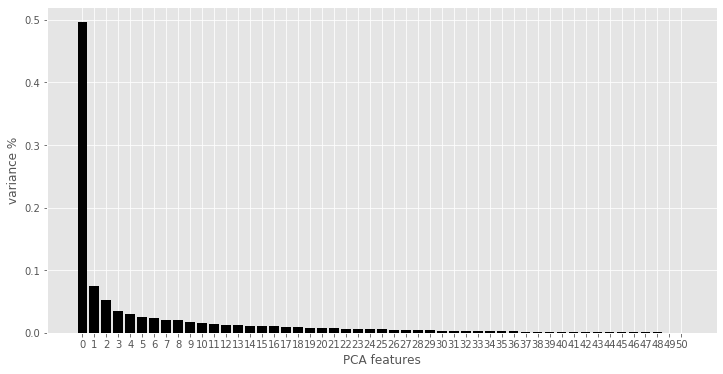

(51, 51)


In [17]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
print(PCA_components.shape)


__Observation:__
- Scree plot showing variance drop-off after the first component.
- Shows that the first component explains the majority of the variance in our data, 50%.

Text(0, 0.5, 'PCA 2')

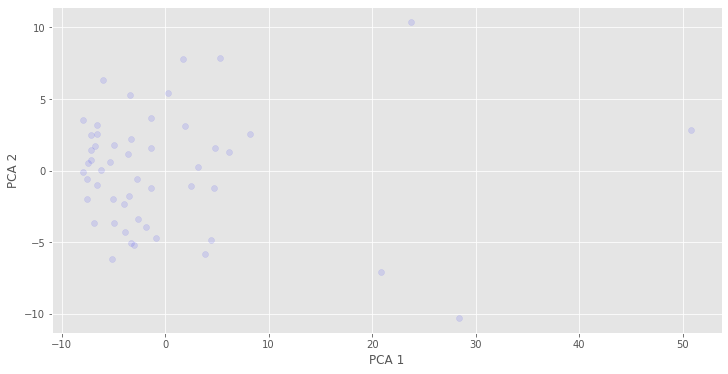

In [18]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

__Observation:__
- Scatter plot of the first two components of the PCA model.
- The observation data for the feaures are very diverse from Income Census metrics to Covid-19 Policy metrics.

### K-Means Clustering Model

####  K-Means Clustering: Using PCA

__Find Optimal number of clusters__

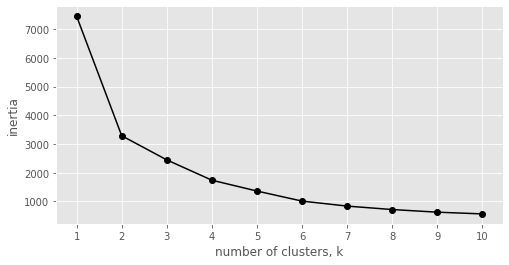

In [19]:
from sklearn.cluster import KMeans
ks = range(1, 10+1)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
figure = plt.figure(figsize=(8,4))    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

__Train Model__

In [20]:
kmeans_clf = KMeans(n_clusters=4, init='k-means++', random_state=42)
model = kmeans_clf.fit(PCA_components.iloc[:,:4])  
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

__Predict Model__

In [21]:
# Trains and predicts the dependent variable to label the specific clusters.  Each group should have similar behaviors within the group.
kmeans_clf = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans_clf.fit_predict(PCA_components.iloc[:,:4])  # Creates the NEW dependent variable (y_kmeans)
print(y_kmeans[:100])

[1 1 0 1 3 1 1 1 1 2 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 2 0 1 0 1
 1 0 1 1 1 1 2 1 1 0 0 1 1 1]


####  K-Means Clustering: Using Original Features

__Find Optimal number of clusters__

[1.5972788746483226e+16, 5144800488983291.0, 2587067066437552.0, 1359003547771747.0, 696681006126972.5, 454149543343123.9, 273025374106246.5, 181195912026320.94, 138921729454084.61, 117080308903107.45]


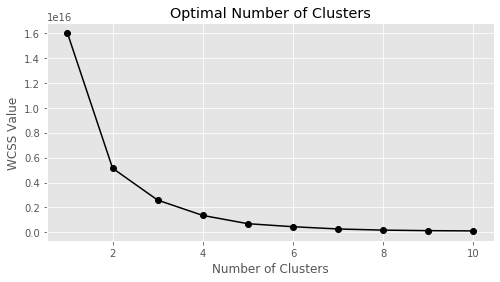

In [22]:
# Compute wcss to find optimal number of clusters for dataset
#    wcss - within cluster sum of squares.  Computer the sum of squares between centriod and pts.
from sklearn.cluster import KMeans
wcss = []  # Empty list
for i in range(1,10+1):  # Number of clusters to try = (10).
    kmeans_clf = KMeans(n_clusters=i, init='k-means++', random_state=42)  # Using init = k-means++ to avoid random init trap
    model = kmeans_clf.fit(df_covid19_census)
    wcss.append(model.inertia_)   # To obtain the wcss values from each cluster
print(wcss)

# Plot the elbow graph
figure = plt.figure(figsize=(8,4))
plt.plot(range(1,10+1), wcss, '-o', color='black')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Value')
plt.show()

__Train Model__

In [23]:
kmeans_clf = KMeans(n_clusters=4, init='k-means++', random_state=42)  # n_clusters=4
model = kmeans_clf.fit(df_covid19_census)  
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

__Predict Model__

In [24]:
# Trains and predicts the dependent variable to label the specific clusters.  Each group should have similar behaviors within the group.
kmeans_clf = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans_clf.fit_predict(df_covid19_census)  # Creates the NEW dependent variable (y_kmeans)
print(y_kmeans[:100])

[0 0 2 0 3 2 0 0 0 1 2 0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 0 2 0 1 2 0 2 0
 0 2 0 0 0 2 1 0 0 2 2 0 2 0]


##  TASK 5: USING AWS SAGEMAKER | TRAIN AND DEPLOY PCA MODEL 

In [25]:
# Install __mxnet__ (!pip istall mxnet) library for PCA Feature Graph creation.
!pip install mxnet

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [26]:
import sagemaker
import boto3
import io
import mxnet as mx
from sagemaker import get_execution_role
from sagemaker import KMeans

In [27]:
# Create AWS Sagemaker session
sagemaker_session = sagemaker.Session()

In [28]:
# Define S3 bucket and .csv file from AWS Cloud Storage 
bucket = 'wwc-covid19-project'
key = 'policy_race_census_master.csv'

In [29]:
# Get IAM role to perform execution for this notebook instance.  
# We will pass this role to the container to facilate training the model.
role = sagemaker.get_execution_role()
print(role)  # To view ID of role

arn:aws:iam::206005106171:role/service-role/AmazonSageMaker-ExecutionRole-20200804T163359


#### Loading the dataset

In [30]:
# Data stored in a public S3 bucket that you can access using the Python SDK to interact with AWS via Boto3 client.
s3_client = boto3.client('s3')

In [31]:
# Grab the data from the CSV file in the bucket.
response = s3_client.get_object(Bucket=bucket, Key=key)
response_body = response["Body"].read()
counties = pd.read_csv(io.BytesIO(response_body), header=0, delimiter=",", low_memory=False)
counties.head()

Unnamed: 0     State_x State Abbreviation  Paid sick leave  \
0           0     Alabama                 AL                0   
1           1      Alaska                 AK                0   
2           2     Arizona                 AZ                1   
3           3    Arkansas                 AR                0   
4           4  California                 CA                1   

   Medicaid Expansion  Population density per square miles  Population 2018  \
0                   0                                93.24          4887871   
1                   1                                 1.11           737438   
2                   1                                62.91          7171646   
3                   1                                56.67          3013825   
4                   1                               241.65         39557045   

   Square Miles  Number Homeless (2019)  Percent Unemployed (2018)  \
0       52420.0                    3261                        5.6   
1      665384.0                    1907                        6.8   
2      113990.0                   10007                        5.4   
3       53179.0                    2717                        4.5   
4      163695.0                  151278                        5.5   

   Percent living under the federal poverty line (2018)  \
0                                               16.8      
1                                               10.9      
2                                               14.0      
3                                               17.2      
4                                               12.8      

   Percent at risk for serious illness due to COVID  All-cause deaths 2018  \
0                                              43.1                  54352   
1                                              32.8                   4453   
2                                              39.1                  59282   
3                                              43.5                  32336   
4                                              33.3                 268818   

   Closed day cares  Closed non-essential businesses State of emergency  \
0                 7                               15          3/13/2020   
1                 0                               17          3/11/2020   
2                 0                               19          3/11/2020   
3                 0                                0          3/11/2020   
4                 0                               15           3/4/2020   

   Stay at home/ shelter in place  \
0                              22   
1                              17   
2                              20   
3                               0   
4                              15   

   Religious Gatherings Exempt Without Clear Social Distance Mandate*  \
0                                                  0                    
1                                                  0                    
2                                                  1                    
3                                                  0                    
4                                                  0                    

   End/relax stay at home/shelter in place  \
0                                       48   
1                                       44   
2                                       66   
3                                        0   
4                                        0   

   Began to reopen businesses statewide  Reopen restaurants  \
0                                    48                  59   
1                                    44                  44   
2                                    58                  61   
3                                    54                  61   
4                                    65                   0   

   Initially reopen restaurants for outdoor dining only  Reopened gyms  \
0                                                

__Data Preparation__

In [32]:
counties.drop(['Unnamed: 0', 'State_x','State Abbreviation','State of emergency','FIPS_CODE'],axis= 1, inplace=True )

__Perform Feature Scaling__

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
counties_scaled=pd.DataFrame(scaler.fit_transform(counties))
counties_scaled.columns=counties.columns
counties_scaled.index=counties.index

#### Dimensionality reduction

In [34]:
from sagemaker import PCA
num_components=20

pca_SM = PCA(role=role,
             train_instance_count=1,
             train_instance_type='ml.c4.xlarge',
             output_path='s3://'+ bucket +'/counties/', 
             num_components=num_components,
             sagemaker_session=sagemaker_session,
             # To Reduce the cost of billable seconds
             train_use_spot_instances=True, # Default=False;On-Demand instance (Cost is more)
             train_max_run=300, # Time-out in secs for the training
             train_max_wait=600) # Time to wait for spot instance availability before using On-Demand instance)

In [35]:
train_data = counties_scaled.values.astype('float32')

In [36]:
%%time
pca_SM.fit(pca_SM.record_set(train_data))

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-08-13 16:32:26 Starting - Starting the training job...
2020-08-13 16:32:27 Starting - Launching requested ML instances......
2020-08-13 16:33:33 Starting - Preparing the instances for training...
2020-08-13 16:34:22 Downloading - Downloading input data...
2020-08-13 16:34:56 Training - Downloading the training image...
2020-08-13 16:35:27 Uploading - Uploading generated training model
2020-08-13 16:35:27 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/13/2020 16:35:18 INFO 140046095394624] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_num_gpus': u'auto', u'_log_level': u'info', u'subtract_mean': u'true', u'force_dense': u'true', u'epochs': 1, u'algorithm_mode': u'regular', u'extra_components': u'-1', u'_kvstore': u'dist_sync', u'_num_kv_servers': u'auto'}
[08/13/2020 16:35:18 INFO 140046095394624] Reading provided configur

Training seconds: 65
Billable seconds: 12
Managed Spot Training savings: 81.5%
CPU times: user 547 ms, sys: 5.47 ms, total: 553 ms
Wall time: 3min 11s


#### Accessing the PCA model attributes

In [37]:
import os

job_name = pca_SM.latest_training_job.name
print(job_name)
model_key = "counties/" + job_name + "/output/model.tar.gz"

boto3.resource('s3').Bucket(bucket).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')

pca-2020-08-13-16-32-26-214


0

In [38]:
import mxnet as mx
pca_model_params = mx.ndarray.load('model_algo-1')

In [39]:
s=pd.DataFrame(pca_model_params['s'].asnumpy())
v=pd.DataFrame(pca_model_params['v'].asnumpy())

In [40]:
s.iloc[15:,:].apply(lambda x: x*x).sum()/s.apply(lambda x: x*x).sum()

0    0.663005
dtype: float32

- We can see that the largest 5 components explain ~66% of the total variance in our dataset.

Take the 5 largest components from our original s and v matrix. Examine the makeup of each PCA component based on the weightings of the original features that are included in the component.

In [41]:
s_5=s.iloc[15:,:]
v_5=v.iloc[:,15:]
v_5.columns=[0,1,2,3,4]

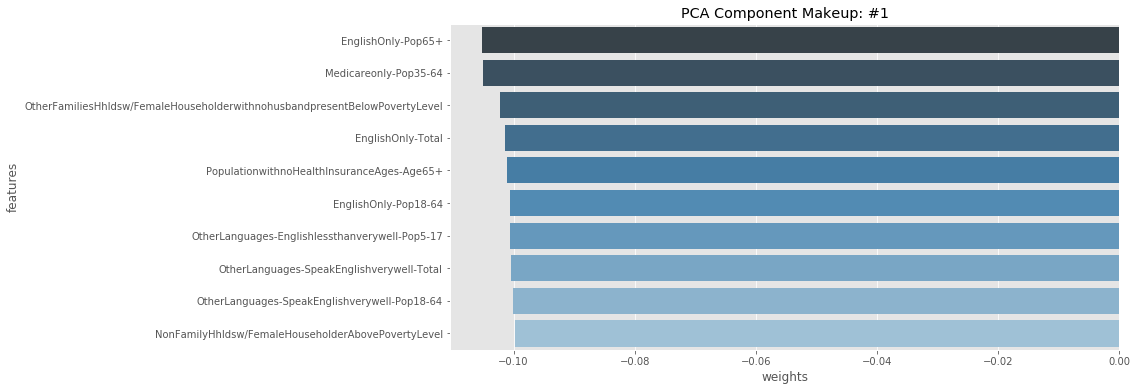

In [42]:
component_num=1

first_comp = v_5[5-component_num]
comps = pd.DataFrame(list(zip(first_comp, counties_scaled.columns)), columns=['weights', 'features'])
comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
ax=sns.barplot(data=comps.sort_values('abs_weights', ascending=False).head(10), x="weights", y="features", palette="Blues_d")
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

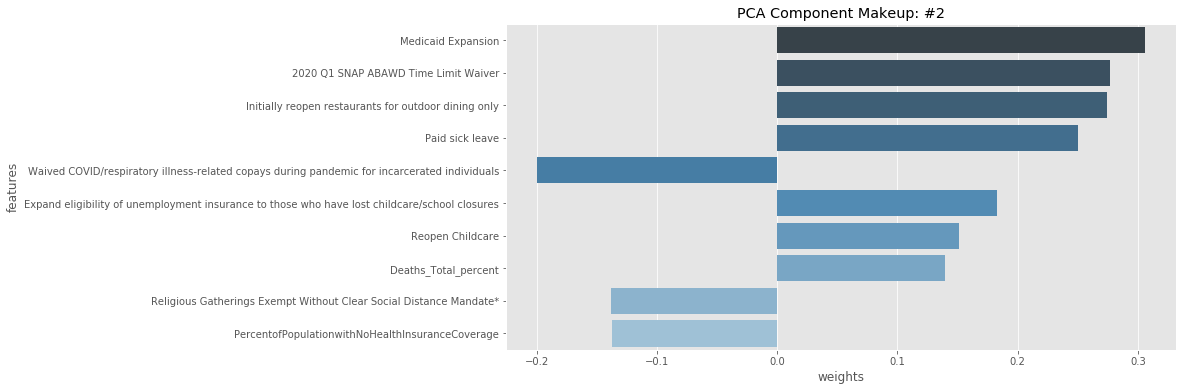

In [43]:
component_num=2

first_comp = v_5[5-component_num]
comps = pd.DataFrame(list(zip(first_comp, counties_scaled.columns)), columns=['weights', 'features'])
comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
ax=sns.barplot(data=comps.sort_values('abs_weights', ascending=False).head(10), x="weights", y="features", palette="Blues_d")
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

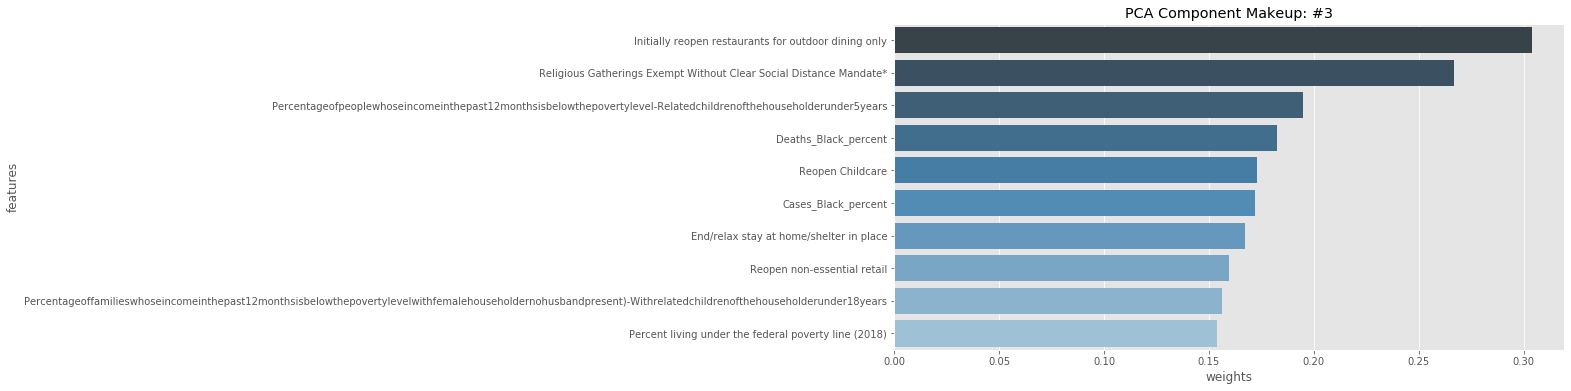

In [44]:
component_num=3

first_comp = v_5[5-component_num]
comps = pd.DataFrame(list(zip(first_comp, counties_scaled.columns)), columns=['weights', 'features'])
comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
ax=sns.barplot(data=comps.sort_values('abs_weights', ascending=False).head(10), x="weights", y="features", palette="Blues_d")
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

__Observation:__

In our evaluation of building PCA model in AWS Sagemaker, we examined the makeup of each PCA component based on the weightings of the original features that are included in the component. For example, the above image shows PCA Component Makeup: #3. This component describes attributes of states that have high poverty, __high Black deaths and cases__, high indicators for ending stay at home policies and initiating re-opening mandates.

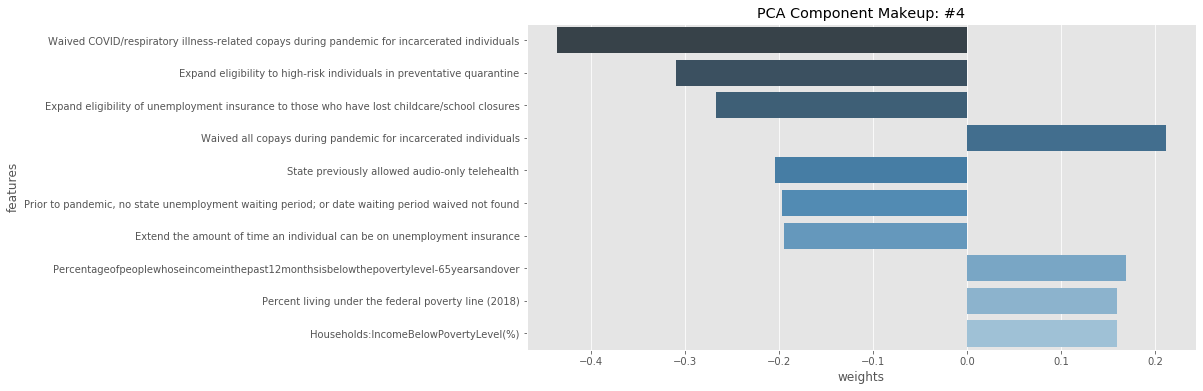

In [45]:
component_num=4

first_comp = v_5[5-component_num]
comps = pd.DataFrame(list(zip(first_comp, counties_scaled.columns)), columns=['weights', 'features'])
comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
ax=sns.barplot(data=comps.sort_values('abs_weights', ascending=False).head(10), x="weights", y="features", palette="Blues_d")
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

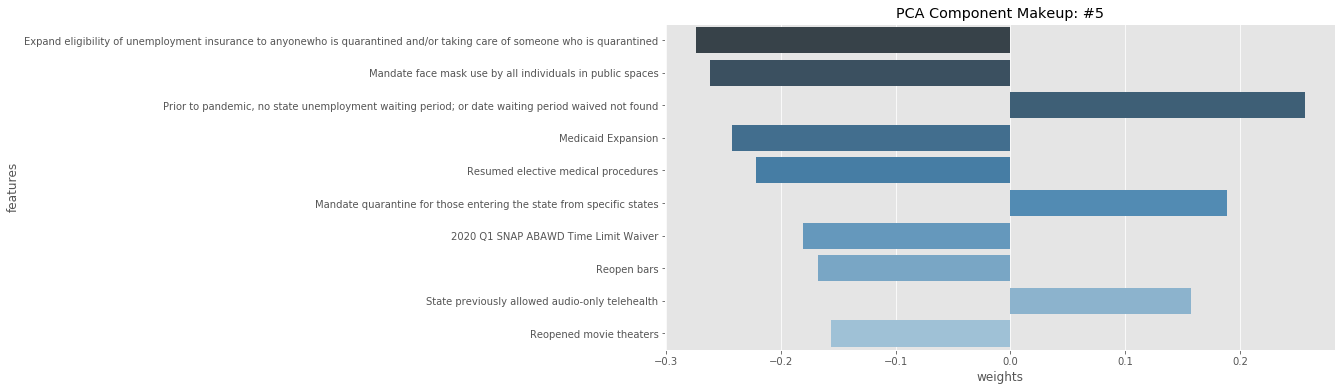

In [46]:
component_num=5

first_comp = v_5[5-component_num]
comps = pd.DataFrame(list(zip(first_comp, counties_scaled.columns)), columns=['weights', 'features'])
comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
ax=sns.barplot(data=comps.sort_values('abs_weights', ascending=False).head(10), x="weights", y="features", palette="Blues_d")
ax.set_title("PCA Component Makeup: #" + str(component_num))
plt.show()

In [47]:
PCA_list=['SpeaksEnglishVeryWell/NonFamilyFemaleAbovePovertyLevel', 'MedicareExpansion/SNAP', 'BelowPoverty/DeathBlackPercent', 'WaivedCopaysforIncarceratedIndiv/LivingUnderFederalPovertyLine', 'Quarantine Mandates/Reopenings']

#### Deploy PCA Model

In [48]:
%%time
pca_predictor = pca_SM.deploy(initial_instance_count=1,
                              instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


---------------!CPU times: user 279 ms, sys: 9.1 ms, total: 288 ms
Wall time: 7min 31s


In [49]:
%%time
result = pca_predictor.predict(train_data)

CPU times: user 18.1 ms, sys: 151 µs, total: 18.2 ms
Wall time: 181 ms


In [50]:
counties_transformed=pd.DataFrame()
for a in result:
    b=a.label['projection'].float32_tensor.values
    counties_transformed=counties_transformed.append([list(b)])
counties_transformed.index=counties_scaled.index
counties_transformed=counties_transformed.iloc[:,15:]
counties_transformed.columns=PCA_list

counties_transformed.head()

SpeaksEnglishVeryWell/NonFamilyFemaleAbovePovertyLevel  \
0                                          -0.333215        
1                                          -0.099735        
2                                           0.054713        
3                                          -0.154675        
4                                          -0.633846        

   MedicareExpansion/SNAP  BelowPoverty/DeathBlackPercent  \
0                1.051203                        0.948501   
1               -0.897670                       -1.123011   
2               -0.085620                       -0.019724   
3                0.358365                        0.207221   
4                1.072024                       -1.798159   

   WaivedCopaysforIncarceratedIndiv/LivingUnderFederalPovertyLine  \
0                                          -1.110491                
1                                           0.065251                
2                                          -0.023542                
3                                          -0.945390                
4                                           0.437278                

   Quarantine Mandates/Reopenings  
0                        0.656297  
1                        1.370469  
2                       -0.617977  
3                        0.954269  
4                       -9.312210

A dataframe is created where each state is described by the 5 principle components. Each of these 5 components is a linear combination of the original feature space. We can interpret each of these 5 components by analyzing the makeup of the component shown previously.

## TASK 6: USING AWS SAGEMAKER | TRAIN AND DEPLOY K-MEANS MODEL

#### Population segmentation using unsupervised clustering

Using the K-means algorithm to segment the population of states by the 5 PCA attributes we have created. K-means is a clustering algorithm that identifies clusters of similar states based on their attributes. Since we have __228__ attributes in our original dataset, the large feature space may have made it difficult to cluster the states effectively. Instead, we have reduced the feature space to 5 PCA components, and we’ll cluster on this transformed dataset.

In [51]:
train_data = counties_transformed.values.astype('float32')

In [52]:
from sagemaker import KMeans

num_clusters = 4
kmeans = KMeans(role=role,
                train_instance_count=1,
                train_instance_type='ml.c4.xlarge',
                output_path='s3://'+ bucket +'/counties/', 
                k=num_clusters,
                # To Reduce the cost of billable seconds
                train_use_spot_instances=True, # Default=False;On-Demand instance (Cost is more)
                train_max_run=300, # Time-out in secs for the training
                train_max_wait=600) # Time to wait for spot instance availability before using On-Demand instance)

In [53]:
%%time
kmeans.fit(kmeans.record_set(train_data))

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-08-13 16:43:11 Starting - Starting the training job...
2020-08-13 16:43:13 Starting - Launching requested ML instances.........
2020-08-13 16:44:42 Starting - Preparing the instances for training......
2020-08-13 16:46:10 Downloading - Downloading input data...
2020-08-13 16:46:37 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/13/2020 16:46:41 INFO 140552804267840] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_


2020-08-13 16:46:50 Uploading - Uploading generated training model
2020-08-13 16:46:50 Completed - Training job completed
Training seconds: 40
Billable seconds: 7
Managed Spot Training savings: 82.5%
CPU times: user 559 ms, sys: 13.6 ms, total: 573 ms
Wall time: 4min 12s


#### Deploy K-means Model

Now we deploy the model and we can pass in the original training set to get the labels for each entry. This will give us which cluster each state belongs to.

In [54]:
%%time
kmeans_predictor = kmeans.deploy(initial_instance_count=1,
                                 instance_type='ml.m4.xlarge')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-------------!CPU times: user 240 ms, sys: 21.2 ms, total: 261 ms
Wall time: 6min 31s


In [55]:
%%time
result=kmeans_predictor.predict(train_data)

CPU times: user 17.1 ms, sys: 42 µs, total: 17.1 ms
Wall time: 211 ms


## TASK 7: PERFORM CLUSER ANALYSIS

In [56]:
cluster_labels = [r.label['closest_cluster'].float32_tensor.values[0] for r in result]
pd.DataFrame(cluster_labels)[0].value_counts()

1.0    22
2.0    15
3.0    10
0.0     4
Name: 0, dtype: int64

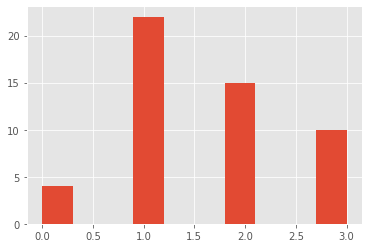

In [57]:
plt.figure(figsize=(6,4))
plt.hist(cluster_labels)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

####  Drawing conclusions from our modelling

In order to draw conclusions from our model, we evaluated the cluster centers. These centers helped to describe which features were characterize in each cluster. By combining PCA and K-means clustering, the information contained in the model attributes within the trained model, enabled us to gain more insights on the data.

#### Accessing the KMeans model attributes

Find bucket where the K-means model is stored and extract it.

In [58]:
job_name = kmeans.latest_training_job.job_name 
print(job_name)
model_key = "counties/" + job_name + "/output/model.tar.gz"

boto3.resource('s3').Bucket(bucket).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')
os.system('unzip model_algo-1')

Kmeans_model_params = mx.ndarray.load('model_algo-1')

kmeans-2020-08-13-16-43-11-776


Cluster Centroid Locations: The location of the centers of each cluster identified by the K-means algorithm. The cluster location is given in our PCA transformed space with 5 components, since we passed the transformed PCA data into the model.

In [59]:
cluster_centroids=pd.DataFrame(Kmeans_model_params[0].asnumpy())
cluster_centroids.columns=counties_transformed.columns
cluster_centroids

SpeaksEnglishVeryWell/NonFamilyFemaleAbovePovertyLevel  \
0                                           0.482232        
1                                           0.056712        
2                                          -0.032049        
3                                          -0.328230        

   MedicareExpansion/SNAP  BelowPoverty/DeathBlackPercent  \
0                0.213278                        0.060717   
1               -0.111343                       -0.585850   
2                0.234273                        0.468806   
3               -0.157036                        0.577064   

   WaivedCopaysforIncarceratedIndiv/LivingUnderFederalPovertyLine  \
0                                           0.368589                
1                                           0.286910                
2                                          -0.918669                
3                                           1.071936                

   Quarantine Mandates/Reopenings  
0                       -4.555387  
1                        1.108768  
2                        0.583427  
3                       -0.755770

Plot a heatmap of the centroids and their location in the transformed feature space. This gives us insight into what characteristics define each cluster. Often with unsupervised learning, results are hard to interpret. This is one way to make use of the results of PCA plus clustering techniques together. Since we were able to examine the makeup of each PCA component, we can understand what each centroid represents in terms of the PCA components that we intepreted previously.

For example, we can see that cluster 1 has the highest value in the “Quarantine Mandates/Reopenings” attribute while it has the lowest value in the “BelowPoverty/DeathBlackPercent” attribute compared with other clusters.

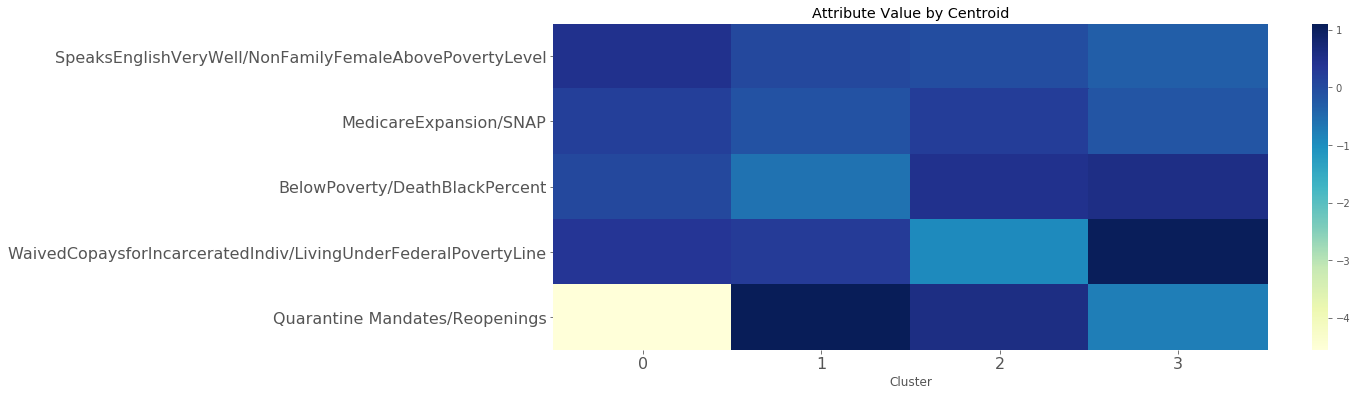

In [60]:
plt.figure(figsize = (16, 6))
ax = sns.heatmap(cluster_centroids.T, cmap = 'YlGnBu')
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")
plt.show()

We can also map the cluster labels back to each individual state and examine which states were naturally grouped together.

In [61]:
counties_transformed['Cluster_Labels']=list(map(int, cluster_labels))
counties_transformed.head()

SpeaksEnglishVeryWell/NonFamilyFemaleAbovePovertyLevel  \
0                                          -0.333215        
1                                          -0.099735        
2                                           0.054713        
3                                          -0.154675        
4                                          -0.633846        

   MedicareExpansion/SNAP  BelowPoverty/DeathBlackPercent  \
0                1.051203                        0.948501   
1               -0.897670                       -1.123011   
2               -0.085620                       -0.019724   
3                0.358365                        0.207221   
4                1.072024                       -1.798159   

   WaivedCopaysforIncarceratedIndiv/LivingUnderFederalPovertyLine  \
0                                          -1.110491                
1                                           0.065251                
2                                          -0.023542                
3                                          -0.945390                
4                                           0.437278                

   Quarantine Mandates/Reopenings  Cluster_Labels  
0                        0.656297               2  
1                        1.370469               1  
2                       -0.617977               3  
3                        0.954269               2  
4                       -9.312210               0

In [62]:
cluster=counties_transformed[counties_transformed['Cluster_Labels']==2]
cluster

SpeaksEnglishVeryWell/NonFamilyFemaleAbovePovertyLevel  \
0                                           -0.333215        
3                                           -0.154675        
10                                           0.794100        
14                                          -0.342734        
16                                           0.390968        
17                                          -1.120434        
18                                          -0.272372        
24                                           0.117339        
25                                           0.822255        
31                                           0.260924        
33                                           0.005573        
36                                           0.576810        
40                                           0.757341        
42                                          -0.152072        
48                                          -0.711695        

    MedicareExpansion/SNAP  BelowPoverty/DeathBlackPercent  \
0                 1.051203                        0.948501   
3                 0.358365                        0.207221   
10               -1.118677                        0.468179   
14               -0.468156                        0.035997   
16               -0.510149                       -0.052328   
17               -0.088236                        0.314303   
18                1.196909                        1.147942   
24                0.632653                        0.776947   
25               -0.047874                        0.464536   
31                1.579540                        0.254952   
33               -0.646871                        0.650295   
36                0.340855                       -0.408926   
40                0.188857                        0.827963   
42                0.461228                        0.816172   
48                1.178669                        1.178448   

    WaivedCopaysforIncarceratedIndiv/LivingUnderFederalPovertyLine  \
0                                           -1.110491                
3                                           -0.945390                
10                                          -0.980353                
14                                          -0.414223                
16                                          -1.299425                
17                                          -0.327449                
18                                           0.004080                
24                                          -1.620412                
25                                          -1.277383                
31                                          -0.252274                
33                                          -1.876453                
36                                          -1.429465                
40                                          -1.483931                
42                                          -0.922295                
48                                          -0.342915                

    Quarantine Mandates/Reopenings  Cluster_Labels  
0                         0.656297               2  
3                         0.954269               2  
10                       -0.910614               2  
14                        0.346074               2  
16                        0.954920               2  
17                        0.707729               2  
18                        0.542256               2  
24                        1.034641               2  
25                        0.306047               2  
31                        0.607270               2  
33                       -0.918366               2  
36                        0.800627               2  
40                        0.524306               2  
42                        0.154788               2  
48                        1.371871               2

Examine Cluster 2 details as it relates to the PCA components.

In [63]:
load_covid19_census['Cluster_Label'] = list(map(int, cluster_labels))
load_covid19_census.head(50)

State_x State Abbreviation  Paid sick leave  \
0                Alabama                 AL                0   
1                 Alaska                 AK                0   
2                Arizona                 AZ                1   
3               Arkansas                 AR                0   
4             California                 CA                1   
5               Colorado                 CO                0   
6            Connecticut                 CT                1   
7               Delaware                 DE                0   
8   District of Columbia                 DC                1   
9                Florida                 FL                0   
10               Georgia                 GA                0   
11                Hawaii                 HI                0   
12                 Idaho                 ID                0   
13              Illinois                 IL                0   
14               Indiana                 IN                0   
15                  Iowa                 IA                0   
16                Kansas                 KS                0   
17              Kentucky                 KY                0   
18             Louisiana                 LA                0   
19                 Maine                 ME                0   
20              Maryland                 MD                1   
21         Massachusetts                 MA                1   
22              Michigan                 MI                1   
23             Minnesota                 MN                0   
24           Mississippi                 MS                0   
25              Missouri                 MO                0   
26               Montana                 MT                0   
27              Nebraska                 NE                0   
28                Nevada                 NV                1   
29         New Hampshire                 NH                0   
30            New Jersey                 NJ                1   
31            New Mexico                 NM                0   
32              New York                 NY                0   
33        North Carolina                 NC                0   
34          North Dakota                 ND                0   
35                  Ohio                 OH                0   
36              Oklahoma                 OK                0   
37                Oregon                 OR                1   
38          Pennsylvania                 PA                0   
39          Rhode Island                 RI                1   
40        South Carolina                 SC                0   
41          South Dakota                 SD                0   
42             Tennessee                 TN                0   
43                 Texas                 TX                0   
44                  Utah                 UT                0   
45               Vermont                 VT                1   
46              Virginia                 VA                0   
47            Washington                 WA                1   
48         West Virginia                 WV                0   
49             Wisconsin                 WI                0   

    Medicaid Expansion  Population density per square miles  Population 2018  \
0                    0                                93.24          4887871   
1                    1                                 1.11           737438   
2                    1                                62.91          7171646   
3                    1                                56.67          3013825   
4                    1                               241.65         39557045   
5                    1                                54.72          5695564   
6                    1                               644.54          3572665   
7                    1                               388.58           967171   
8                    1          

In [89]:
load_covid19_census.to_csv('./load_covid19_census-FINAL_CLUSTER_DATA.csv')

### Cluster Analysis 

Using unsupervised learning, we clustered a dataset using K-means after reducing the dimensionality using PCA. By accessing the underlying models created within Amazon SageMaker, we were able to improve the explainability of our modelling and draw actionable conclusions. Using these techniques, we have been able to better understand the characteristics of different states in the US and segment them into groupings accordingly.

In [64]:
cluster_zero = load_covid19_census[load_covid19_census['Cluster_Label']==0]
cluster_zero

State_x State Abbreviation  Paid sick leave  Medicaid Expansion  \
4   California                 CA                1                   1   
9      Florida                 FL                0                   0   
32    New York                 NY                0                   1   
43       Texas                 TX                0                   0   

    Population density per square miles  Population 2018  Square Miles  \
4                                241.65         39557045      163695.0   
9                                323.90         21299325       65758.0   
32                               358.21         19542209       54555.0   
43                               106.86         28701845      268596.0   

    Number Homeless (2019)  Percent Unemployed (2018)  \
4                   151278                        5.5   
9                    28328                        5.2   
32                   92091                        5.0   
43                   25848                        4.9   

    Percent living under the federal poverty line (2018)  \
4                                                12.8      
9                                                13.6      
32                                               13.6      
43                                               14.9      

    Percent at risk for serious illness due to COVID  All-cause deaths 2018  \
4                                               33.3                 268818   
9                                               42.1                 205426   
32                                              36.9                 157183   
43                                              34.8                 202211   

    Closed day cares  Closed non-essential businesses State of emergency  \
4                  0                               15           3/4/2020   
9                  0                                0           3/9/2020   
32                 0                               15           3/7/2020   
43                 0                               18          3/13/2020   

    Stay at home/ shelter in place  \
4                               15   
9                               25   
32                              15   
43                               0   

    Religious Gatherings Exempt Without Clear Social Distance Mandate*  \
4                                                   0                    
9                                                   1                    
32                                                  1                    
43                                                  1                    

    End/relax stay at home/shelter in place  \
4                                         0   
9                                        70   
32                                       98   
43                                        0   

    Began to reopen businesses statewide  Reopen restaurants  \
4                                     65                   0   
9                                     70                  70   
32                                    69                 107   
43                                    49                  49   

    Initially reopen restaurants for outdoor dining only  Reopened gyms  \
4                                                   0                 0   
9                                                   0                70   
32                                                  1                 0   
43                                                  0                66   

    Reopened movie theaters  Reopened hair salons/barber shops  \
4                         0                                138   
9                         0                                 63   
32                        0                                107   
43                       49                                 56   

    Reopen non-essential construction  Reopen Religious gatherings  \
4    

In [65]:
cluster_one = load_covid19_census[load_covid19_census['Cluster_Label']==1]
cluster_one

State_x State Abbreviation  Paid sick leave  \
1                 Alaska                 AK                0   
5               Colorado                 CO                0   
6            Connecticut                 CT                1   
7               Delaware                 DE                0   
8   District of Columbia                 DC                1   
11                Hawaii                 HI                0   
12                 Idaho                 ID                0   
15                  Iowa                 IA                0   
19                 Maine                 ME                0   
26               Montana                 MT                0   
27              Nebraska                 NE                0   
28                Nevada                 NV                1   
29         New Hampshire                 NH                0   
34          North Dakota                 ND                0   
37                Oregon                 OR                1   
39          Rhode Island                 RI                1   
41          South Dakota                 SD                0   
44                  Utah                 UT                0   
45               Vermont                 VT                1   
47            Washington                 WA                1   
49             Wisconsin                 WI                0   
50               Wyoming                 WY                0   

    Medicaid Expansion  Population density per square miles  Population 2018  \
1                    1                                 1.11           737438   
5                    1                                54.72          5695564   
6                    1                               644.54          3572665   
7                    1                               388.58           967171   
8                    1                             11496.81           702455   
11                   1                               129.94          1420491   
12                   1                                20.99          1754208   
15                   1                                56.09          3156145   
19                   1                                37.83          1338404   
26                   1                                 7.22          1062305   
27                   1                                24.94          1929268   
28                   1                                27.44          3034392   
29                   1                               145.09          1356458   
34                   1                                10.75           760077   
37                   1                                42.60          4190713   
39                   1                               684.35          1057315   
41                   0                                11.44           882235   
44                   1                                37.23          3161105   
45                   1                                65.13           626299   
47                   1                               105.69          7535591   
49                   0                                88.76          5813568   
50                   0                                 5.91           577737   

    Square Miles  Number Homeless (2019)  Percent Unemployed (2018)  \
1       665384.0                    1907                        6.8   
5       104094.0                    9619                        3.9   
6         5543.0                    3033                        5.5   
7         2489.0                     921                        5.7   
8           61.1                    6521                        7.5   
11       10932.0                    6412                        3.8   
12       83569.0                    2315                        4.0   
15       56273.0                    2315                        3.6   
19       35380.0                    2106                        

In [66]:
cluster_two = load_covid19_census[load_covid19_census['Cluster_Label']==2]
cluster_two

State_x State Abbreviation  Paid sick leave  Medicaid Expansion  \
0          Alabama                 AL                0                   0   
3         Arkansas                 AR                0                   1   
10         Georgia                 GA                0                   0   
14         Indiana                 IN                0                   1   
16          Kansas                 KS                0                   0   
17        Kentucky                 KY                0                   1   
18       Louisiana                 LA                0                   1   
24     Mississippi                 MS                0                   0   
25        Missouri                 MO                0                   0   
31      New Mexico                 NM                0                   1   
33  North Carolina                 NC                0                   0   
36        Oklahoma                 OK                0                   0   
40  South Carolina                 SC                0                   0   
42       Tennessee                 TN                0                   0   
48   West Virginia                 WV                0                   1   

    Population density per square miles  Population 2018  Square Miles  \
0                                 93.24          4887871       52420.0   
3                                 56.67          3013825       53179.0   
10                               177.02         10519475       59425.0   
14                               183.74          6691878       36420.0   
16                                35.39          2911505       82278.0   
17                               110.58          4468402       40408.0   
18                                88.97          4659978       52378.0   
24                                61.66          2986530       48432.0   
25                                87.89          6126452       69707.0   
31                                17.23          2095428      121590.0   
33                               192.94         10383620       53819.0   
36                                56.41          3943079       69899.0   
40                               158.78          5084127       32020.0   
42                               160.64          6770010       42144.0   
48                                74.53          1805832       24230.0   

    Number Homeless (2019)  Percent Unemployed (2018)  \
0                     3261                        5.6   
3                     2717                        4.5   
10                   10443                        4.8   
14                    5471                        4.4   
16                    2381                        3.8   
17                    4079                        5.2   
18                    2941                        6.4   
24                    1184                        7.1   
25                    6179                        4.2   
31                    3241                        6.1   
33                    9314                        5.0   
36                    3944                        4.4   
40                    4172                        5.3   
42                    7467                        5.5   
48                    1397                        5.8   

    Percent living under the federal poverty line (2018)  \
0                                                16.8      
3                                                17.2      
10                                               14.3      
14                                               13.1      
16                                               12.0      
17                                               16.9      
18                                               18.6      
24                                               19.7      
25                                               13.2      
31                                               19.5      
33  

In [83]:
cluster_three = load_covid19_census[load_covid19_census['Cluster_Label']==3]
cluster_three

State_x State Abbreviation  Paid sick leave  Medicaid Expansion  \
2         Arizona                 AZ                1                   1   
13       Illinois                 IL                0                   1   
20       Maryland                 MD                1                   1   
21  Massachusetts                 MA                1                   1   
22       Michigan                 MI                1                   1   
23      Minnesota                 MN                0                   1   
30     New Jersey                 NJ                1                   1   
35           Ohio                 OH                0                   1   
38   Pennsylvania                 PA                0                   1   
46       Virginia                 VA                0                   1   

    Population density per square miles  Population 2018  Square Miles  \
2                                 62.91          7171646      113990.0   
13                               220.00         12741080       57914.0   
20                               487.08          6042718       12406.0   
21                               653.98          6902149       10554.0   
22                               103.36          9995915       96714.0   
23                                64.54          5611179       86936.0   
30                              1021.27          8908520        8723.0   
35                               260.77         11689442       44826.0   
38                               278.09         12807060       46054.0   
46                               199.13          8517685       42775.0   

    Number Homeless (2019)  Percent Unemployed (2018)  \
2                    10007                        5.4   
13                   10199                        5.5   
20                    6561                        4.9   
21                   18471                        4.8   
22                    8575                        5.3   
23                    7977                        3.4   
30                    8862                        4.9   
35                   10345                        4.9   
38                   13199                        4.9   
46                    5783                        4.2   

    Percent living under the federal poverty line (2018)  \
2                                                14.0      
13                                               12.1      
20                                                9.0      
21                                               10.0      
22                                               14.1      
23                                                9.6      
30                                                9.5      
35                                               13.9      
38                                               12.2      
46                                               10.7      

    Percent at risk for serious illness due to COVID  All-cause deaths 2018  \
2                                               39.1                  59282   
13                                              36.2                 110022   
20                                              37.1                  50568   
21                                              34.6                  59152   
22                                              41.2                  98903   
23                                              33.9                  44745   
30                                              34.6                  75765   
35                                              39.8                 124264   
38                                              39.8                 134702   
46                                              35.9                  69359   

    Closed day cares  Closed non-essential businesses State of emergency  \
2                  0                               19          3/11/2020   
13                14                

In [95]:
cluster_zero[['Deaths_Black_percent', 
             'Cases_Black_percent', 
             'Percent living under the federal poverty line (2018)', 
             'Percent at risk for serious illness due to COVID',
             'Percent Unemployed (2018)',
             'End/relax stay at home/shelter in place',
             'Households:IncomeBelowPovertyLevel(%)']].describe()

Deaths_Black_percent  Cases_Black_percent  \
count              4.000000             4.000000   
mean              13.687500             5.220000   
std                8.599598             7.103581   
min                3.790000             0.000000   
25%                7.855000             1.492500   
50%               14.785000             2.595000   
75%               20.617500             6.322500   
max               21.390000            15.690000   

       Percent living under the federal poverty line (2018)  \
count                                           4.000000      
mean                                           13.725000      
std                                             0.869387      
min                                            12.800000      
25%                                            13.400000      
50%                                            13.600000      
75%                                            13.925000      
max                                            14.900000      

       Percent at risk for serious illness due to COVID  \
count                                          4.000000   
mean                                          36.775000   
std                                            3.844802   
min                                           33.300000   
25%                                           34.425000   
50%                                           35.850000   
75%                                           38.200000   
max                                           42.100000   

       Percent Unemployed (2018)  End/relax stay at home/shelter in place  \
count                   4.000000                                 4.000000   
mean                    5.150000                                42.000000   
std                     0.264575                                49.826365   
min                     4.900000                                 0.000000   
25%                     4.975000                                 0.000000   
50%                     5.100000                                35.000000   
75%                     5.275000                                77.000000   
max                     5.500000                                98.000000   

       Households:IncomeBelowPovertyLevel(%)  
count                               4.000000  
mean                               13.897500  
std                                 0.523347  
min                                13.160000  
25%                                13.707500  
50%                                14.075000  
75%                                14.265000  
max                                14.280000

In [96]:
cluster_one[['Deaths_Black_percent', 
             'Cases_Black_percent', 
             'Percent living under the federal poverty line (2018)', 
             'Percent at risk for serious illness due to COVID',
             'Percent Unemployed (2018)',
             'End/relax stay at home/shelter in place',
             'Households:IncomeBelowPovertyLevel(%)']].describe()

Deaths_Black_percent  Cases_Black_percent  \
count             22.000000            22.000000   
mean               8.392273             9.254091   
std               16.729068            11.253959   
min                0.000000             0.000000   
25%                0.000000             2.497500   
50%                2.430000             5.050000   
75%                6.285000            12.007500   
max               75.070000            48.290000   

       Percent living under the federal poverty line (2018)  \
count                                          22.000000      
mean                                           11.327273      
std                                             1.818995      
min                                             7.600000      
25%                                            10.475000      
50%                                            11.050000      
75%                                            12.575000      
max                                            16.200000      

       Percent at risk for serious illness due to COVID  \
count                                         22.000000   
mean                                          36.600000   
std                                            3.247563   
min                                           30.000000   
25%                                           35.150000   
50%                                           36.450000   
75%                                           39.075000   
max                                           42.500000   

       Percent Unemployed (2018)  End/relax stay at home/shelter in place  \
count                  22.000000                                22.000000   
mean                    4.327273                                47.909091   
std                     1.266108                                37.435543   
min                     2.800000                                 0.000000   
25%                     3.500000                                 0.000000   
50%                     3.850000                                53.500000   
75%                     5.375000                                78.500000   
max                     7.500000                               103.000000   

       Households:IncomeBelowPovertyLevel(%)  
count                              22.000000  
mean                               11.605455  
std                                 1.668009  
min                                 8.020000  
25%                                10.682500  
50%                                11.360000  
75%                                12.760000  
max                                15.290000

In [97]:
cluster_two[['Deaths_Black_percent', 
             'Cases_Black_percent', 
             'Percent living under the federal poverty line (2018)', 
             'Percent at risk for serious illness due to COVID',
             'Percent Unemployed (2018)',
             'End/relax stay at home/shelter in place',
             'Households:IncomeBelowPovertyLevel(%)']].describe()

Deaths_Black_percent  Cases_Black_percent  \
count             15.000000            15.000000   
mean              28.836667            19.106000   
std               17.239230            13.471098   
min                0.520000             2.140000   
25%               14.840000             8.425000   
50%               32.390000            18.390000   
75%               42.370000            28.095000   
max               52.330000            49.540000   

       Percent living under the federal poverty line (2018)  \
count                                          15.000000      
mean                                           15.953333      
std                                             2.376632      
min                                            12.000000      
25%                                            14.150000      
50%                                            15.600000      
75%                                            17.500000      
max                                            19.700000      

       Percent at risk for serious illness due to COVID  \
count                                         15.000000   
mean                                          41.393333   
std                                            3.024535   
min                                           36.200000   
25%                                           39.650000   
50%                                           41.400000   
75%                                           42.800000   
max                                           49.300000   

       Percent Unemployed (2018)  End/relax stay at home/shelter in place  \
count                  15.000000                                15.000000   
mean                    5.206667                                40.333333   
std                     0.902747                                26.655652   
min                     3.800000                                 0.000000   
25%                     4.450000                                22.000000   
50%                     5.200000                                48.000000   
75%                     5.700000                                52.500000   
max                     7.100000                                73.000000   

       Households:IncomeBelowPovertyLevel(%)  
count                              15.000000  
mean                               16.128000  
std                                 2.236701  
min                                12.270000  
25%                                14.740000  
50%                                15.470000  
75%                                17.550000  
max                                20.110000

In [98]:
cluster_three[['Deaths_Black_percent', 
             'Cases_Black_percent', 
             'Percent living under the federal poverty line (2018)', 
             'Percent at risk for serious illness due to COVID',
             'Percent Unemployed (2018)',
             'End/relax stay at home/shelter in place',
             'Households:IncomeBelowPovertyLevel(%)']].describe()

Deaths_Black_percent  Cases_Black_percent  \
count             10.000000            10.000000   
mean              20.305000            17.232000   
std               13.115629             9.244542   
min                2.950000             2.430000   
25%                9.760000            10.707500   
50%               18.490000            16.235000   
75%               27.337500            24.367500   
max               40.770000            29.870000   

       Percent living under the federal poverty line (2018)  \
count                                          10.000000      
mean                                           11.510000      
std                                             2.010224      
min                                             9.000000      
25%                                             9.700000      
50%                                            11.400000      
75%                                            13.475000      
max                                            14.100000      

       Percent at risk for serious illness due to COVID  \
count                                         10.000000   
mean                                          37.220000   
std                                            2.587062   
min                                           33.900000   
25%                                           34.925000   
50%                                           36.650000   
75%                                           39.625000   
max                                           41.200000   

       Percent Unemployed (2018)  End/relax stay at home/shelter in place  \
count                  10.000000                                10.000000   
mean                    4.820000                                77.600000   
std                     0.619677                                10.002222   
min                     3.400000                                66.000000   
25%                     4.825000                                69.500000   
50%                     4.900000                                76.500000   
75%                     5.200000                                84.500000   
max                     5.500000                                92.000000   

       Households:IncomeBelowPovertyLevel(%)  
count                              10.000000  
mean                               11.850000  
std                                 1.912055  
min                                 9.100000  
25%                                10.345000  
50%                                11.785000  
75%                                13.677500  
max                                14.350000

In [110]:
cluster_zero.corr()['Deaths_Black_percent'].abs().sort_values(ascending = False)[:10]

Deaths_Black_percent                                                          1.000000
Square Miles                                                                  0.983276
Spanish-Englishlessthanverywell-Pop5-17                                       0.978942
Population density per square miles                                           0.964115
End/relax stay at home/shelter in place                                       0.950570
Spanish-SpeakEnglishverywell-Pop65+                                           0.944642
PopulationwithnoHealthInsuranceAges-19-34                                     0.935033
Deaths_Other_percent                                                          0.928077
OtherFamiliesHhldsw/FemaleHouseholderwithnohusbandpresentBelowPovertyLevel    0.923570
EnglishOnly-Pop5-17                                                           0.919283
Name: Deaths_Black_percent, dtype: float64

In [109]:
cluster_one.corr()['Deaths_Black_percent'].abs().sort_values(ascending = False)[:10]

Deaths_Black_percent                                                                   1.000000
Population density per square miles                                                    0.903286
Cases_Black_percent                                                                    0.889487
Reopened ACA enrollment using a special enrollment period                              0.761356
homeles_percent                                                                        0.694041
Percentageofpeoplewhoseincomeinthepast12monthsisbelowthepovertylevel-65yearsandover    0.649246
Percent Unemployed (2018)                                                              0.603931
Cases_Total_percent                                                                    0.590276
Percent living under the federal poverty line (2018)                                   0.589101
Reopen non-essential retail                                                            0.530910
Name: Deaths_Black_percent, dtype: float

In [108]:
cluster_two.corr()['Deaths_Black_percent'].abs().sort_values(ascending = False)[:10]

Deaths_Black_percent                                                                                  1.000000
Weekly unemployment insurance maximum amount (dollars)                                                0.811329
Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)    0.811329
Cases_Total_percent                                                                                   0.723472
Deaths_Unknown_percent                                                                                0.678839
Cases_Black_percent                                                                                   0.670383
Cases_Total                                                                                           0.621709
OtherFamiliesHhldsw/FemaleHouseholderwithnohusbandpresentBelowPovertyLevel                            0.586362
homeles_percent                                                                                       0.567207
C

In [112]:
cluster_three.corr()['Deaths_Black_percent'].abs().sort_values(ascending = False)[:10]

Deaths_Black_percent                                                                                1.000000
Deaths_Unknown_percent                                                                              0.817314
Cases_Black_percent                                                                                 0.767753
Face mask mandate enforced by criminal charge/citation                                              0.732474
Closed day cares                                                                                    0.668366
Prior to pandemic, no state unemployment waiting period; or date waiting period waived not found    0.644258
Reopen bars                                                                                         0.545739
Stopped personal visitation in state prisons                                                        0.540883
homeles_percent                                                                                     0.537566
Unemployment insura

# TASK 8: PERFORM CLUSER VISUALIZATION

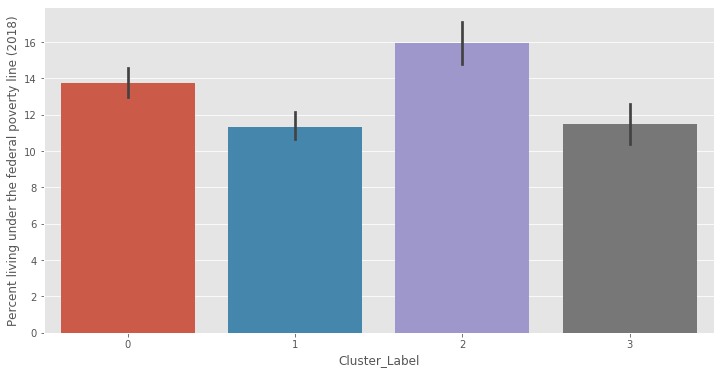

In [117]:
sns.barplot(x='Cluster_Label', y='Percent living under the federal poverty line (2018)', data=load_covid19_census)
plt.show();

- Cluster 2: Has the highest Percent living under the federal poverty line (2018) (16%)

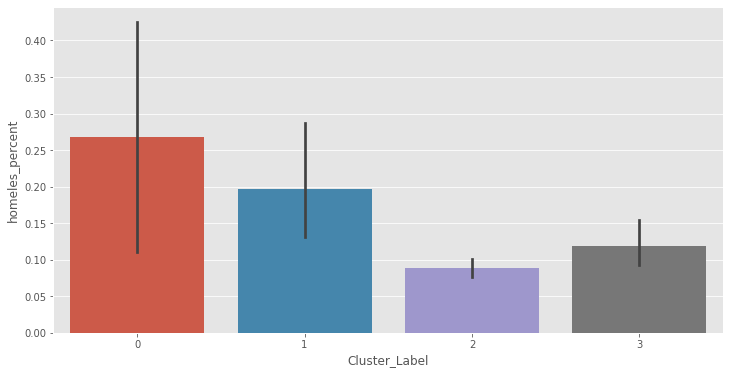

In [120]:
sns.barplot(x='Cluster_Label', y='homeles_percent', data=load_covid19_census)
plt.show();

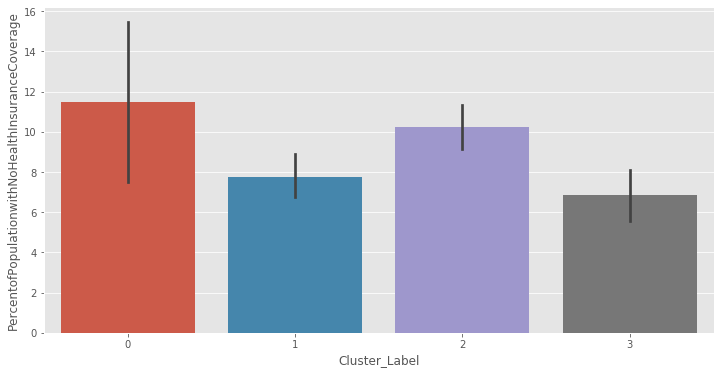

In [124]:
sns.barplot(x='Cluster_Label', y='PercentofPopulationwithNoHealthInsuranceCoverage', data=load_covid19_census)
plt.show();

- Cluster 2: Has the second most PercentofPopulationwithNoHealthInsuranceCoverage (11%)

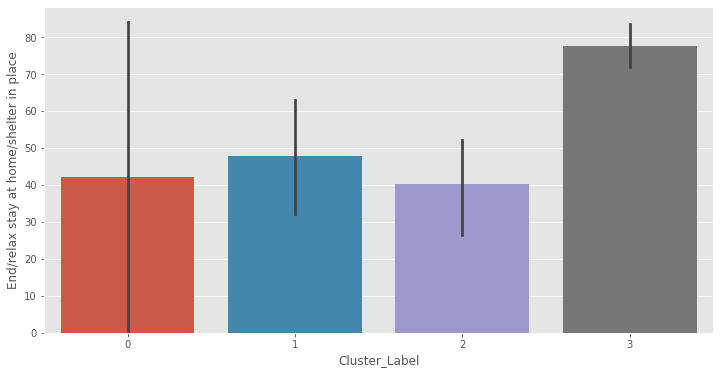

In [119]:
sns.barplot(x='Cluster_Label', y='End/relax stay at home/shelter in place', data=load_covid19_census)
plt.show();

- Cluster 2:  Relaxed the the Stay at home policy earlier than the rest of the states based on the number of days after the date of emergency was issued for that state. 
- Cluster 2:  Less social distancing.

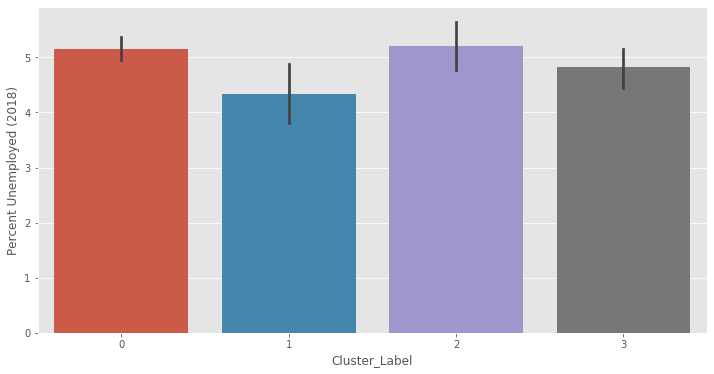

In [123]:
sns.barplot(x='Cluster_Label', y='Percent Unemployed (2018)', data=load_covid19_census)
plt.show();

- Cluster 2: Has the most Percent Unemployed (2018) (6%)

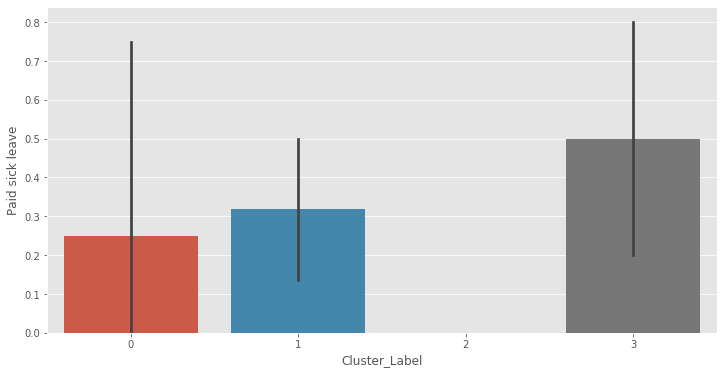

In [126]:
sns.barplot(x='Cluster_Label', y='Paid sick leave', data=load_covid19_census)
plt.show();

- Cluster 2: With the lowest (almost none) - This cluster may not be encourged to stay at home when sick because they do not have paid sick leave.

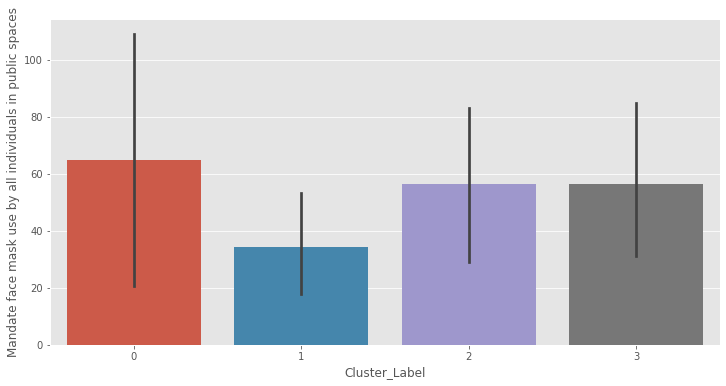

In [128]:
sns.barplot(x='Cluster_Label', y='Mandate face mask use by all individuals in public spaces', data=load_covid19_census)
plt.show();

- Cluster 2: Re-open with face masks.

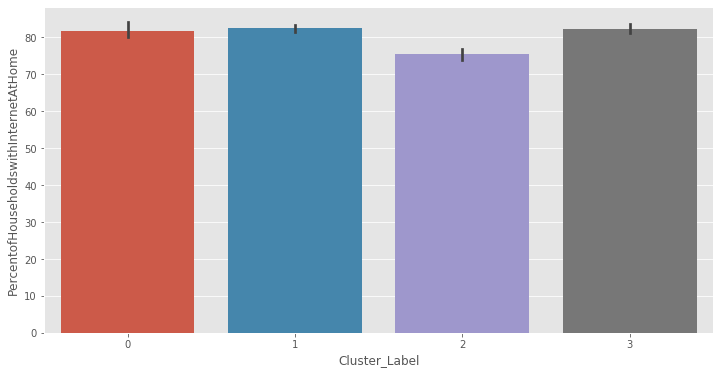

In [131]:
sns.barplot(x='Cluster_Label', y='PercentofHouseholdswithInternetAtHome', data=load_covid19_census)
plt.show();

- Cluster 2: Has the lowest percent of housholds with Internet at Home.
- Cluster 2: Less likely to work and learn from home.

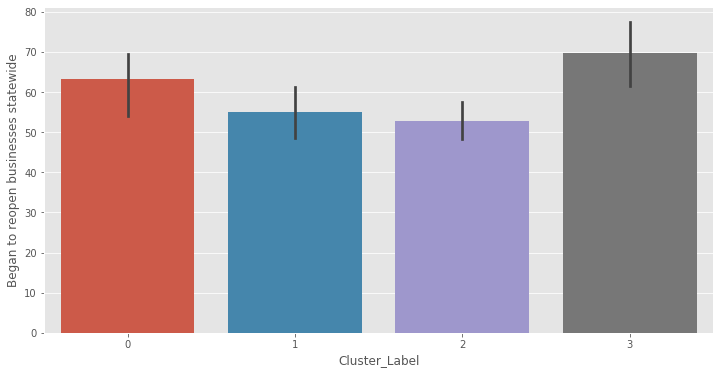

In [127]:
sns.barplot(x='Cluster_Label', y='Began to reopen businesses statewide', data=load_covid19_census)
plt.show();

- Cluster 2: Re-open businesses earlier than the other states.

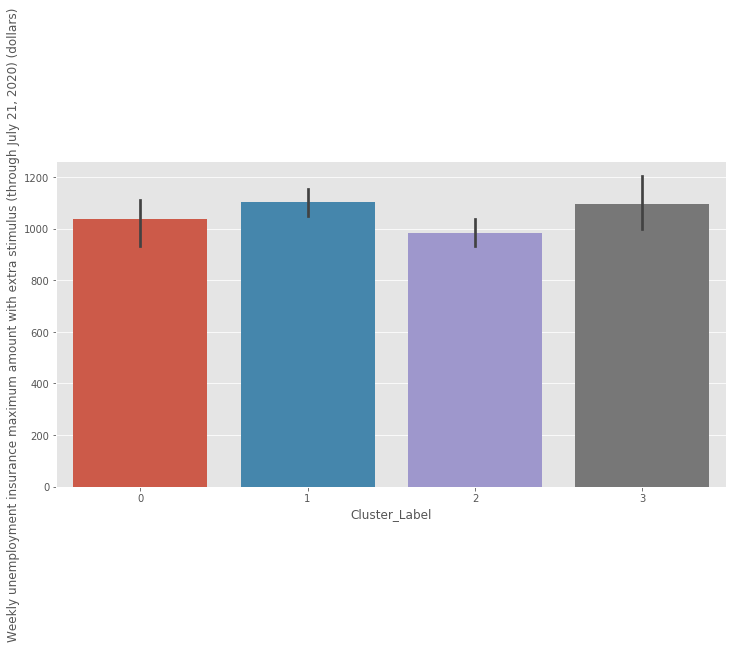

In [118]:
sns.barplot(x='Cluster_Label', y='Weekly unemployment insurance maximum amount with extra stimulus (through July 21, 2020) (dollars)', data=load_covid19_census)
plt.show();

- Cluster 2: Did _not_ take advantage of the extra stimulus provided with the Weekly unemployment insurance.

#### Observations:

__Cluster 2 Data Visualization Insights:__
- Cluster 2: Has the highest Percent living under the federal poverty line (2018) (16%)
- Cluster 2: Has the second most PercentofPopulationwithNoHealthInsuranceCoverage (11%)
- Cluster 2:  Relaxed the the Stay at home policy earlier than the rest of the states based on the number of days after the date of emergency was issued for that state. 
- Cluster 2:  Less social distancing.
- Cluster 2: Has the most Percent Unemployed (2018) (6%)
- Cluster 2: With the lowest (almost none) - This cluster may not be encourged to stay at home when sick because they do not have paid sick leave.
- Cluster 2: Re-open with face masks.
- Cluster 2: Has the lowest percent of housholds with Internet at Home.
- Cluster 2: Less likely to work and learn from home.
- Cluster 2: Re-open businesses earlier than the other states.
- Cluster 2: Did _not_ take advantage of the extra stimulus provided with the Weekly unemployment insurance.

## TASK 9: DELETE AWS SAGEMAKER ENDPOINTS

Delete endpoints to avoid any excess charges on our AWS bill.

In [74]:
sagemaker.Session().delete_endpoint(pca_predictor.endpoint)

In [75]:
sagemaker.Session().delete_endpoint(kmeans_predictor.endpoint)

## TASK 10: ML PROJECT CONCLUSIONS

In our analysis of the all of the clusters, we found that __Cluster 2__ best described how blacks in these states were being impacted by COVID-19.  This process revealed new features strongly associated with this segmentation, such as, __high poverty, high Black deaths and cases, high indicators for ending stay at home policies and initiating re-opening mandates.__

> __Key Findings__
- 41.4% At Risk for serious illness due to COVID-19 (highest)
- 15.47% Households: Income Below Poverty Level (highest)
- 32.39% Deaths_Black (highest)
- 18.4% Cases_Black (highest)
- 15.6% Living under federal poverty line as of 2018 (highest)
- Did not stay at home; Had to participate in the reopenings
- Has high Black Death Percent
- Below Poverty
- Living under Federal Poverty Line

## TASK 11: RECOMMENDATIONS

The data and our analysis on how COVID-19 is impacting the black communities disproportionately in the United States reveals a link that’s hard to ignore between __race, poverty, cases and deaths__ in America. 

Our analysis demonstrates the following features that are impacted:

__by Government Policies__
- Relaxing stay at home measures
- Initiating early business re-opening
- Obtaining health insurance
- Obtaining paid sick leave

__by Socioeconomic Issues__
- Living under Federal Poverty Line
- Unemployment
- Access to Internet

> These factors _also_ indicate an infrastructure issue in America and the need for having a __National Policy__ on __Health Care and Income Inequities__.

Our recommendations involve having meaningful actions to support these communities and protect public health could include __protective policies for workers, including paid sick leave and provision of health insurance__.  For high poverty and unemployment policymakers should work to address minimizing the income inequality gap.

During the pandemic to address poverty and unemployment we need to identify the black populations which need additional access to resources such as __testing, personal protective equipment, education, and support to implement recommended social distancing practices__; support food pantries and meal delivery services for food assistance; and __relief funds are available to the communities most in need__ by streamlining application processes and allowing for __extensions of subsidies when the crisis begins to subside__.

## TASK 12: FUTURE WORK

-  Build Machine Learning models with PCA and K-means clustering using data by counties and/or zipcodes when it is available.
-  Build a forecasting model to predict the Deaths for the high at risk Black communities.

# END

__Resource__: https://aws.amazon.com/blogs/machine-learning/analyze-us-census-data-for-population-segmentation-using-amazon-sagemaker/